In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
inp_df = pd.read_csv("data/prices_round_1_day_0.csv",delimiter=";")
df1 = pd.DataFrame(inp_df[inp_df["product"] == "STARFRUIT"]["mid_price"]).reset_index(drop=True)
df_prices = pd.concat([df1],axis=1)
df_prices = df_prices.set_axis(["AMETHYSYS"],axis=1)
df_prices

,AMETHYSYS
0,5039.5
1,5042.0
2,5040.0
3,5040.5
4,5039.5
...,...
9995,5052.5
9996,5051.0
9997,5053.5
9998,5049.5


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

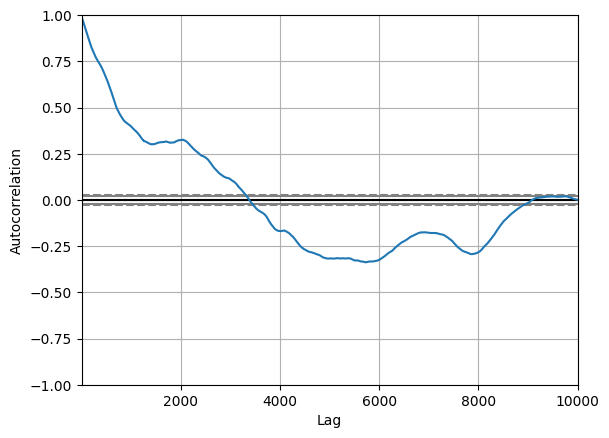

In [77]:
pd.plotting.autocorrelation_plot(df_prices)

In [78]:
from statsmodels.tsa.arima.model import ARIMA

In [79]:
model = ARIMA(df_prices, order=(4,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              AMETHYSYS   No. Observations:                10000
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -18117.123
Date:                Wed, 17 Apr 2024   AIC                          36238.245
Time:                        11:09:42   BIC                          36252.666
Sample:                             0   HQIC                         36243.126
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4713      0.008    -60.544      0.000      -0.487      -0.456
sigma2         2.1943      0.027     81.612      0.000       2.142       2.247
Ljung-Box (L1) (Q):                 166.10   Jarque-

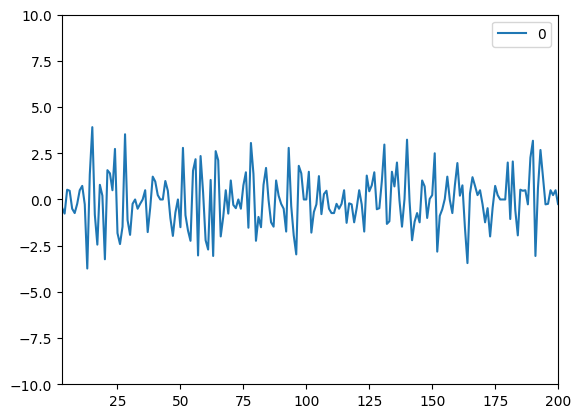

In [80]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.xlim(3,200)
plt.ylim(-10,10)
plt.show()


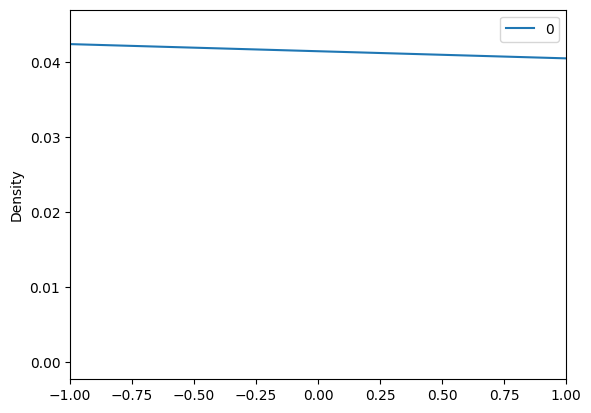

In [81]:
# density plot of residuals
residuals.plot(kind='kde')
plt.xlim(-1,1)
plt.show()

In [82]:
inp_df = pd.read_csv("data/prices_round_1_day_0.csv",delimiter=";")
df1 = pd.DataFrame(inp_df[inp_df["product"] == "STARFRUIT"]["mid_price"]).reset_index(drop=True)
df_prices = pd.concat([df1],axis=1)
df_prices = df_prices.set_axis(["AMETHYSYS"],axis=1)
df_prices

,AMETHYSYS
0,5039.5
1,5042.0
2,5040.0
3,5040.5
4,5039.5
...,...
9995,5052.5
9996,5051.0
9997,5053.5
9998,5049.5
